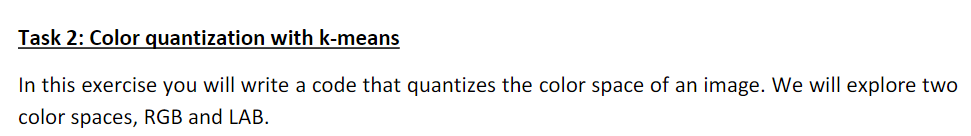

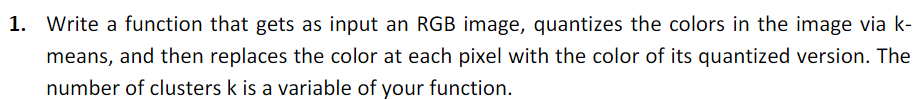

In [1]:
import os
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import imageio
from skimage import color, io
import cv2


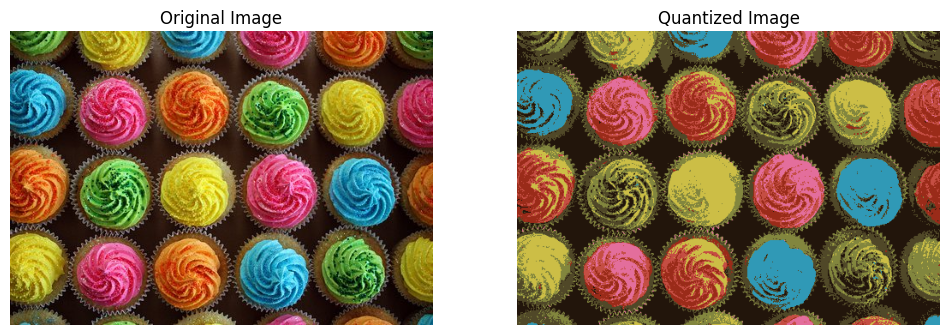

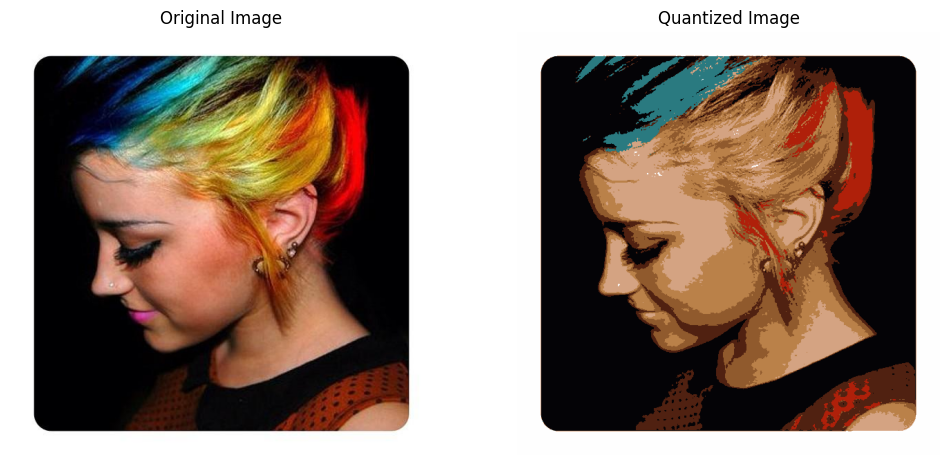

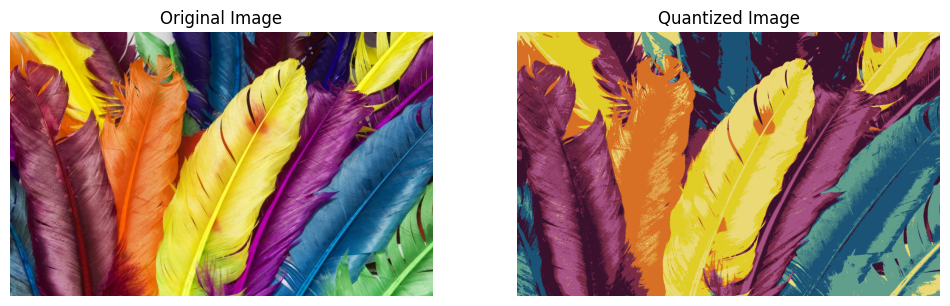

In [13]:
def quantize_image_kmeans(image, k):
    """
    Quantizes the colors in the input image using k-means clustering.

    Parameters:
    image (numpy.ndarray): Input RGB image.
    k (int): Number of clusters for k-means.

    Returns:
    numpy.ndarray: Quantized image.
    """
    # Reshape the image to a 2D array of pixels
    data = image.reshape((-1, 3))
    data = np.float32(data)

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)

    # Replace each pixel value with its corresponding cluster center
    quantized_data = kmeans.cluster_centers_[kmeans.labels_]
    quantized_data = np.clip(quantized_data, 0, 255).astype(np.uint8)

    # Reshape the quantized data to the original image shape
    quantized_image = quantized_data.reshape(image.shape)

    return quantized_image

# Create output directory if it does not exist
output_dir = 'Task2-solution2'
os.makedirs(output_dir, exist_ok=True)

imges = os.listdir('./Images/Task2')   
for img in imges:
    path = './Images/Task2/' + img
    # Read the image using plt.imread
    image = plt.imread(path)

    # Convert the image to uint8 if it's in float format
    if image.dtype == np.float32 or image.dtype == np.float64:
        image = (image * 255).astype(np.uint8)
    
    # Number of clusters
    k = 8
    # Quantize the image
    quantized_image = quantize_image_kmeans(image, k)
     # Save the quantized image to the output directory using imageio
    save_path = os.path.join(output_dir, f'quantized_{img}')
    imageio.imwrite(save_path, quantized_image)
    
    # Plot the original and quantized images side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot original image
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    
    # Plot quantized image
    ax[1].imshow(quantized_image)
    ax[1].set_title('Quantized Image')
    ax[1].axis('off')
 
    # Show the plots
    plt.show()
    

    

    
    




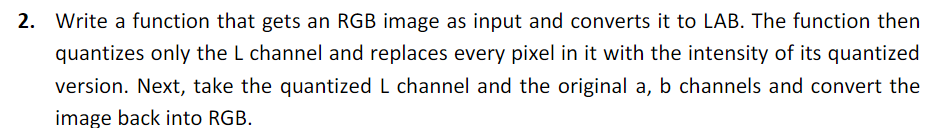

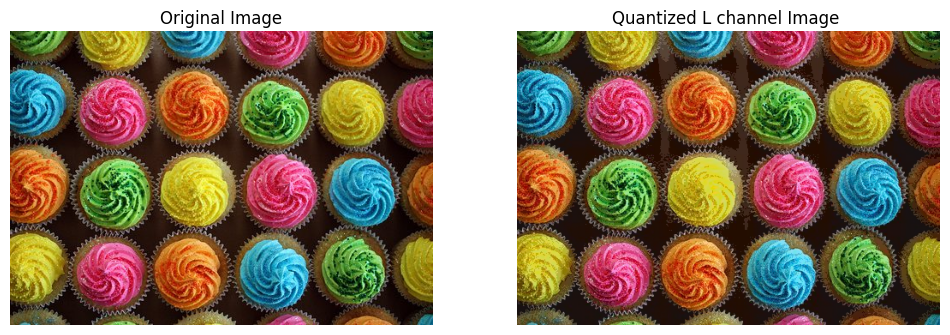

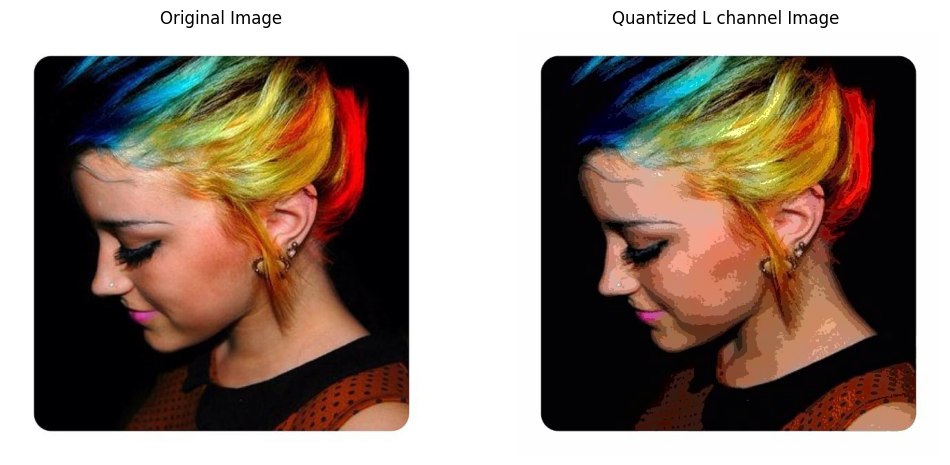

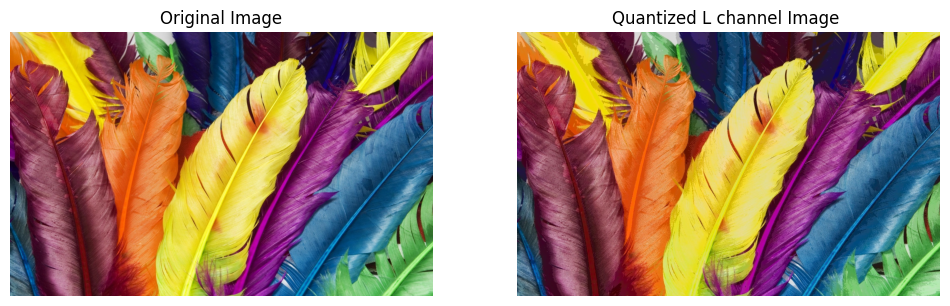

In [4]:
def quantize_l_channel(image, k):
    """
    Converts an RGB image to LAB, quantizes the L channel, and converts it back to RGB.

    Parameters:
    image (numpy.ndarray): Input RGB image.
    k (int): Number of clusters for k-means quantization.

    Returns:
    numpy.ndarray: RGB image with quantized L channel.
    """
    # Convert RGB to LAB
    lab_image = color.rgb2lab(image)

    # Extract L, a, b channels
    L = lab_image[:, :, 0]
    a = lab_image[:, :, 1]
    b = lab_image[:, :, 2]

    # Reshape the L channel to a 2D array of pixels
    L_reshaped = L.reshape(-1, 1)

    # Apply k-means clustering to the L channel
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(L_reshaped)

    # Replace each pixel value with its corresponding cluster center
    L_quantized = kmeans.cluster_centers_[kmeans.labels_].reshape(L.shape)

    # Combine the quantized L channel with the original a and b channels
    quantized_lab_image = np.stack((L_quantized, a, b), axis=2)

    # Convert LAB back to RGB
    quantized_rgb_image = color.lab2rgb(quantized_lab_image)

    # Convert the image from float [0, 1] to uint8 [0, 255]
    quantized_rgb_image = (quantized_rgb_image * 255).astype(np.uint8)

    return quantized_rgb_image


# Create output directory if it does not exist
output_dir2 = 'Task2-solut'
os.makedirs(output_dir2, exist_ok=True)
imges = os.listdir('./Images/Task2')   

for img in imges:
    # Read the image
    image_path = path = './Images/Task2/' + img
    image = io.imread(image_path)
    # Number of clusters
    k = 8
    quantized_image = quantize_l_channel(image, k)
    # Save the quantized image to the output directory using imageio
    save_path = os.path.join(output_dir2, f'quantized_{img}')
    imageio.imwrite(save_path, quantized_image)
    
    # Plot the original and quantized images side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot original image
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    
    # Plot quantized image
    ax[1].imshow(quantized_image)
    ax[1].set_title('Quantized L channel Image ')
    ax[1].axis('off')
    
    

    


    


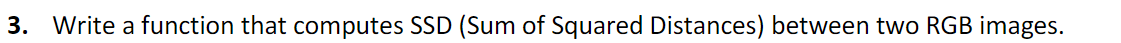

In [14]:
def calculate_ssd(img1, img2):
    """Computing the sum of squared differences (SSD) between two images."""
    if img1.shape != img2.shape:
        print("Images don't have the same shape.")
        return None
    return np.sum((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32))**2)

image_path1 = './Images/Task1/cameraman.jpg'
image1 = io.imread(image_path1)
image_path2 = './Images/Task1/house.jpg'
image2 = io.imread(image_path2)

print(calculate_ssd(image1, image2))


3843511600.0


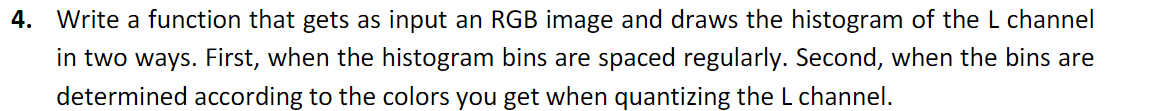

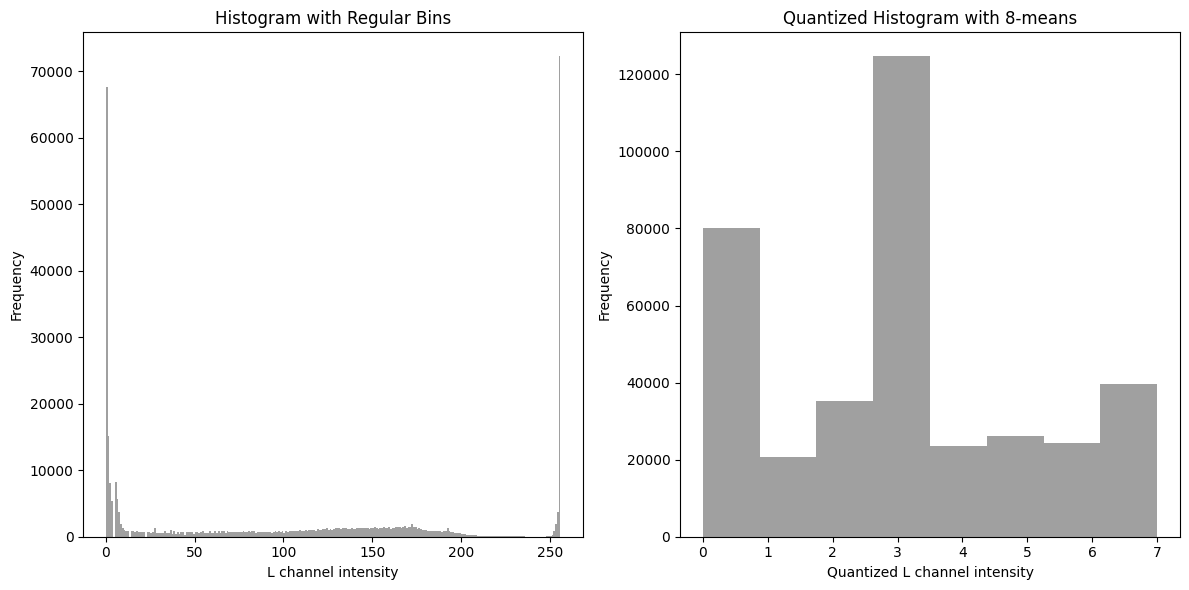

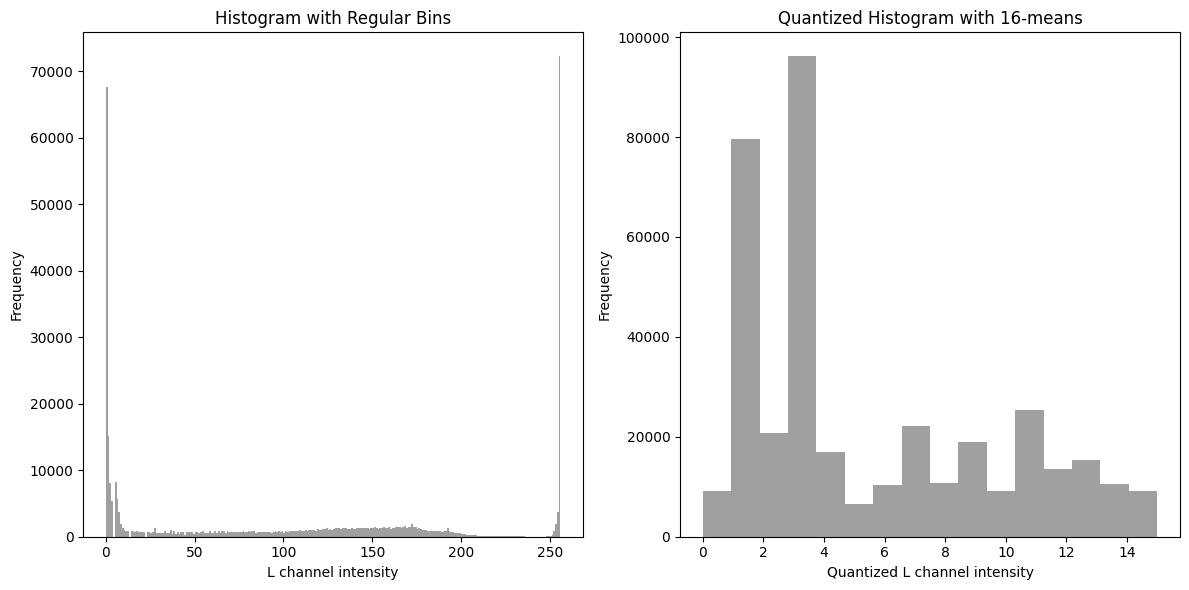

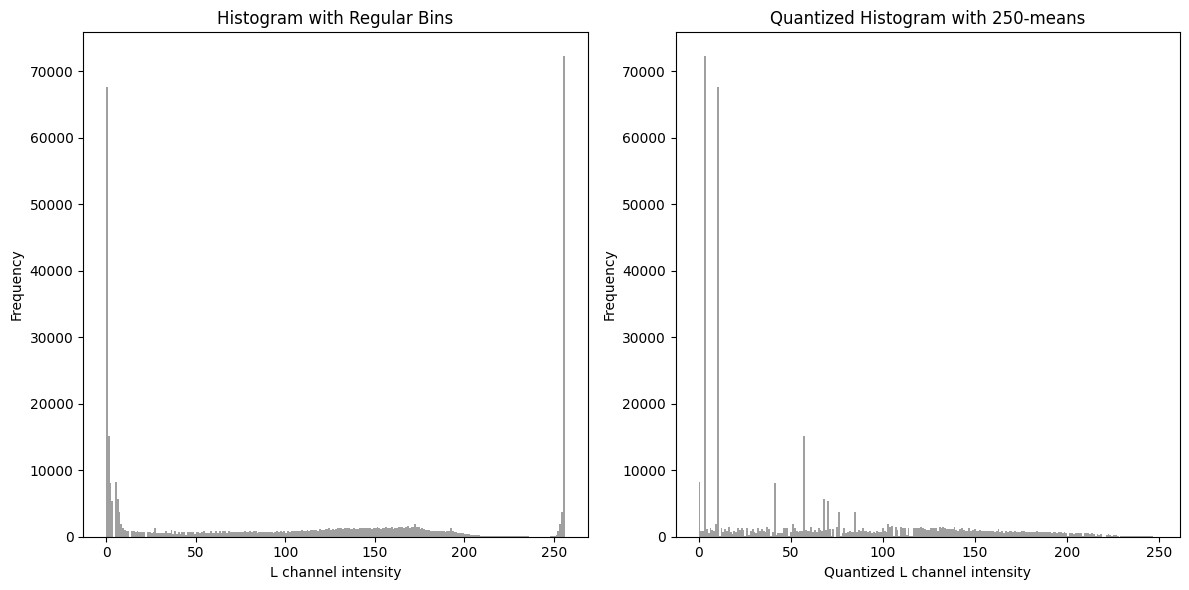

In [25]:

def draw_histograms(image,n_clusters):
    """
    Draws the histogram of the L channel in two ways: with regular bins and with quantized bins.

    Parameters:
    image (numpy.ndarray): The input RGB image as a NumPy array.
    """
    # Convert the image to the Lab color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2Lab)
    
    # Extract the L channel
    L_channel = lab_image[:, :, 0]
    
    # Plot histogram with regular bins
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(L_channel.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.75)
    plt.title('Histogram with Regular Bins')
    plt.xlabel('L channel intensity')
    plt.ylabel('Frequency')
    
    # Quantize the L channel
    L_flattened = L_channel.reshape(-1, 1)
    # Number of bins for quantization
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(L_flattened)
    quantized_L = kmeans.labels_
    
    # Plot histogram with quantized bins
    plt.subplot(1, 2, 2)
    plt.hist(quantized_L, bins=n_clusters, color='gray', alpha=0.75)
    plt.title(f'Quantized Histogram with {n_clusters}-means')
    plt.xlabel('Quantized L channel intensity')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

for k in [8,16,250]:
    draw_histograms(io.imread('./Images/Task2/colorful1.jpg'),k)

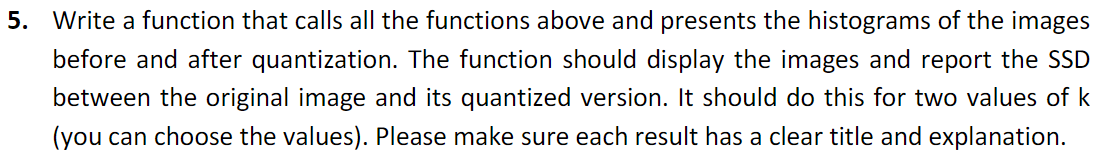

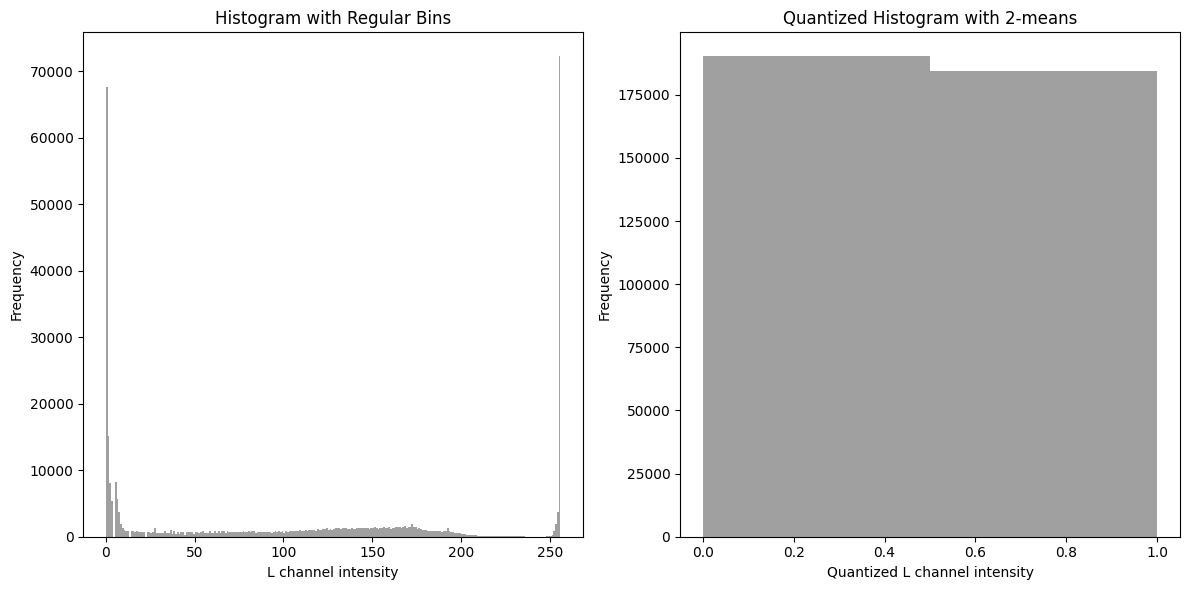

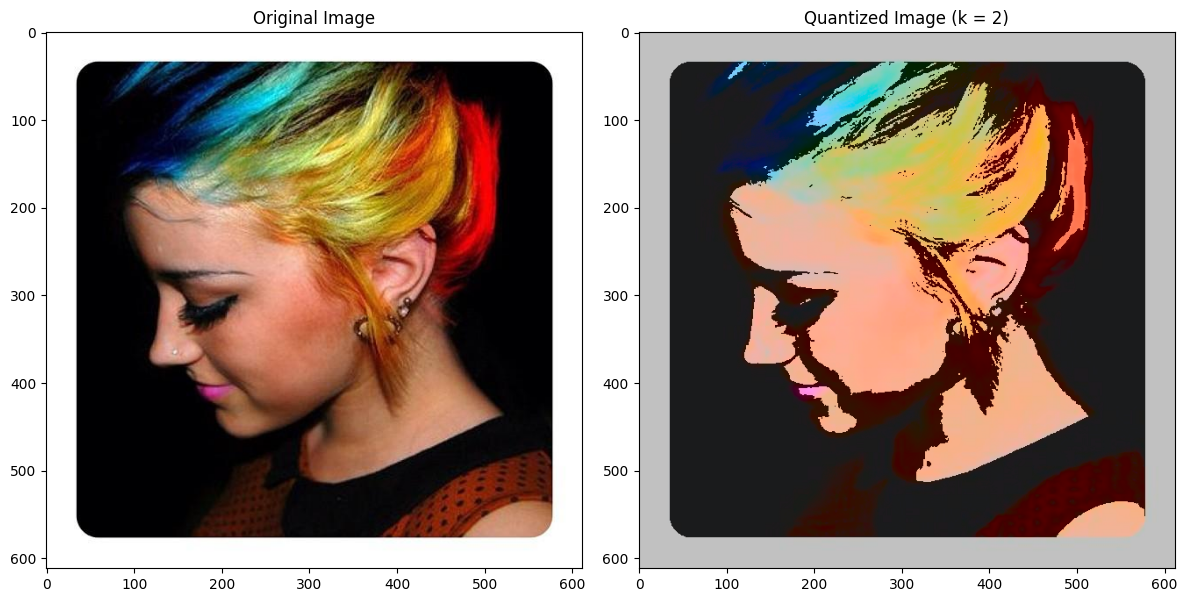

SSD between the original and quantized images (k = 2): 112492531.00


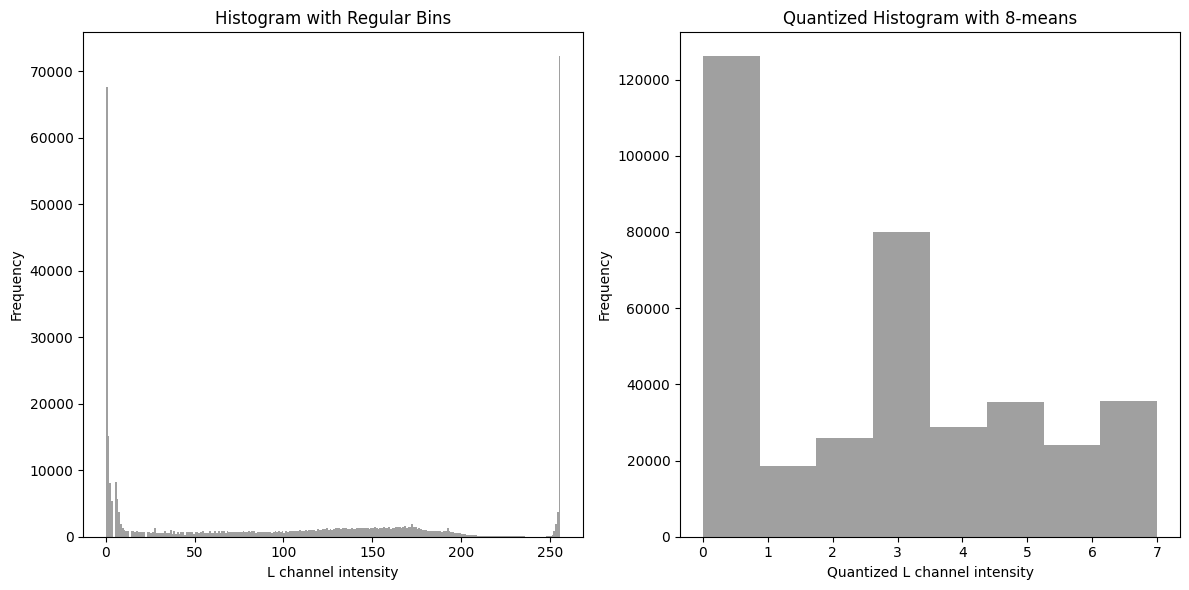

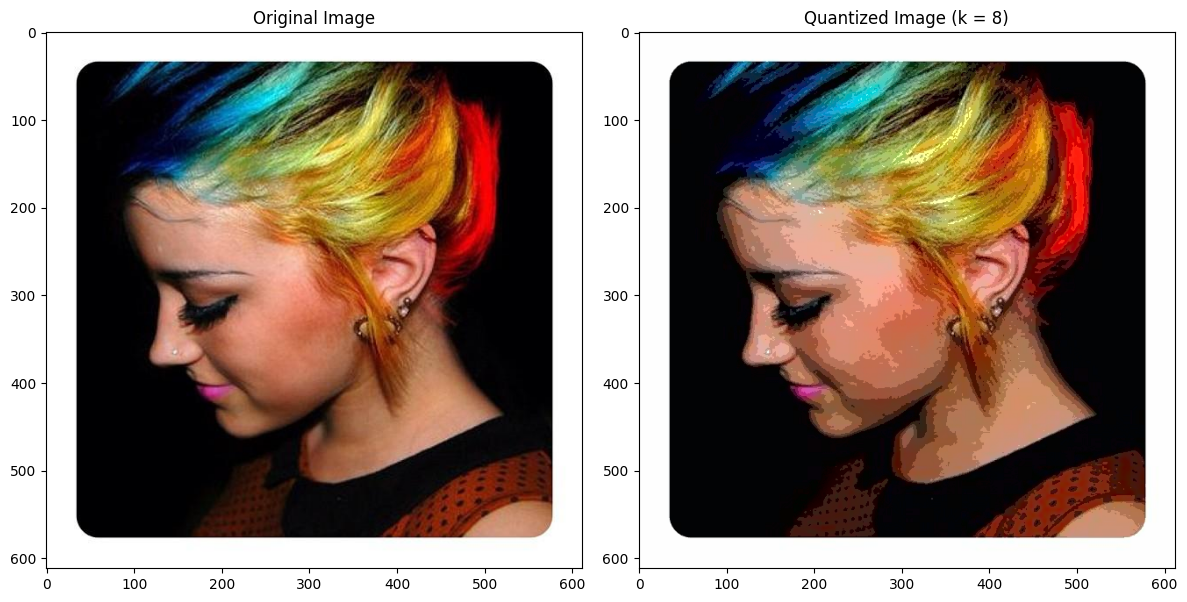

SSD between the original and quantized images (k = 8): 40794758.00


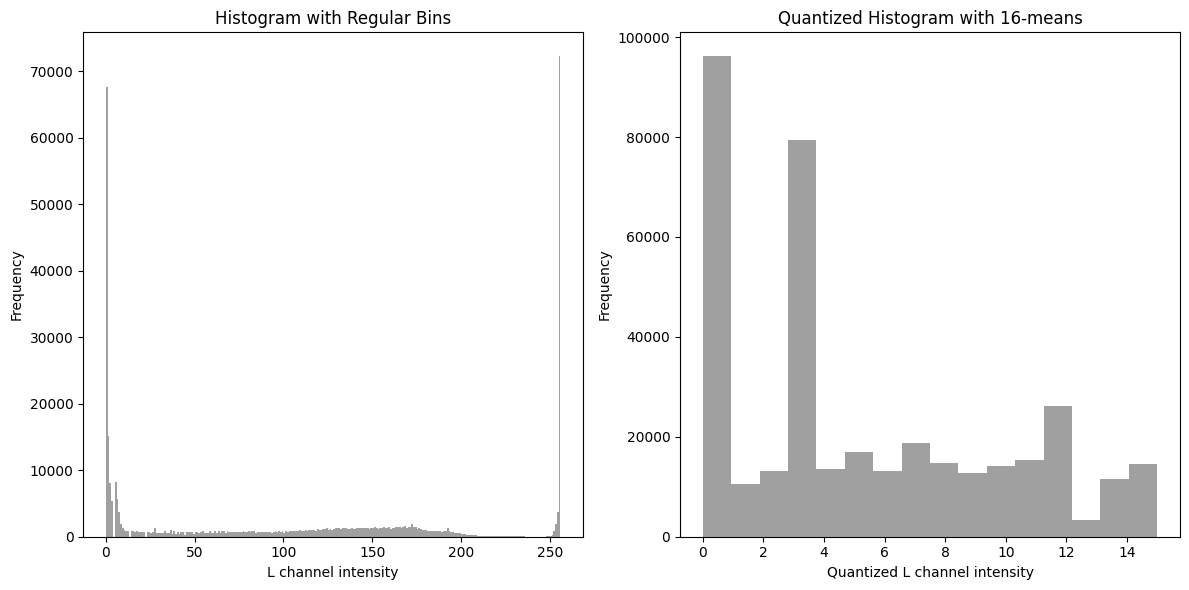

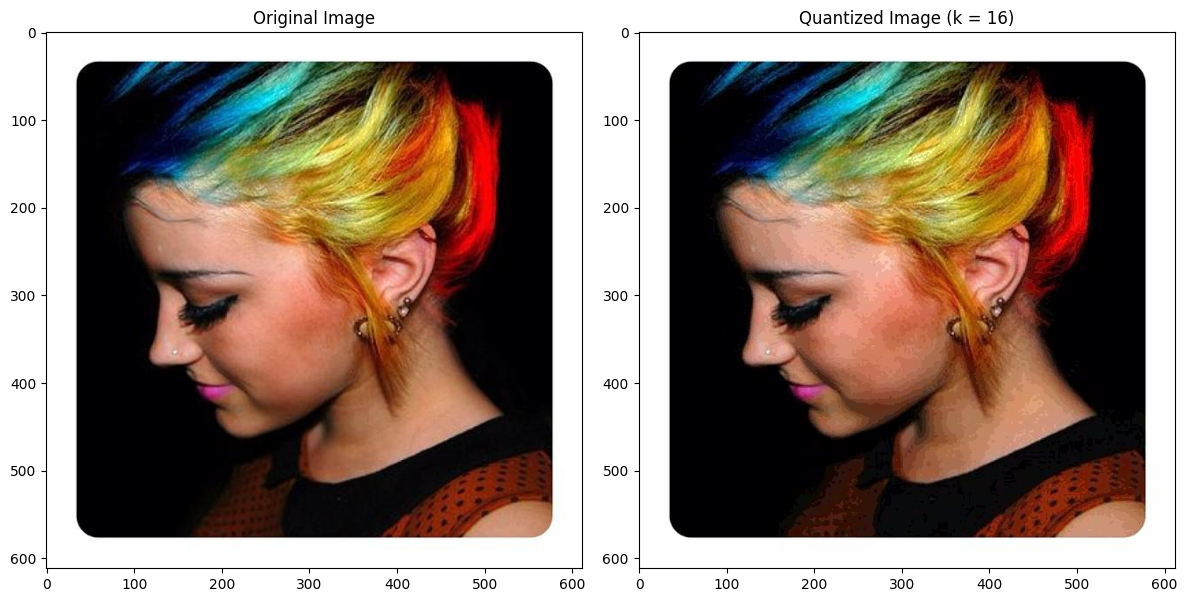

SSD between the original and quantized images (k = 16): 14130913.00


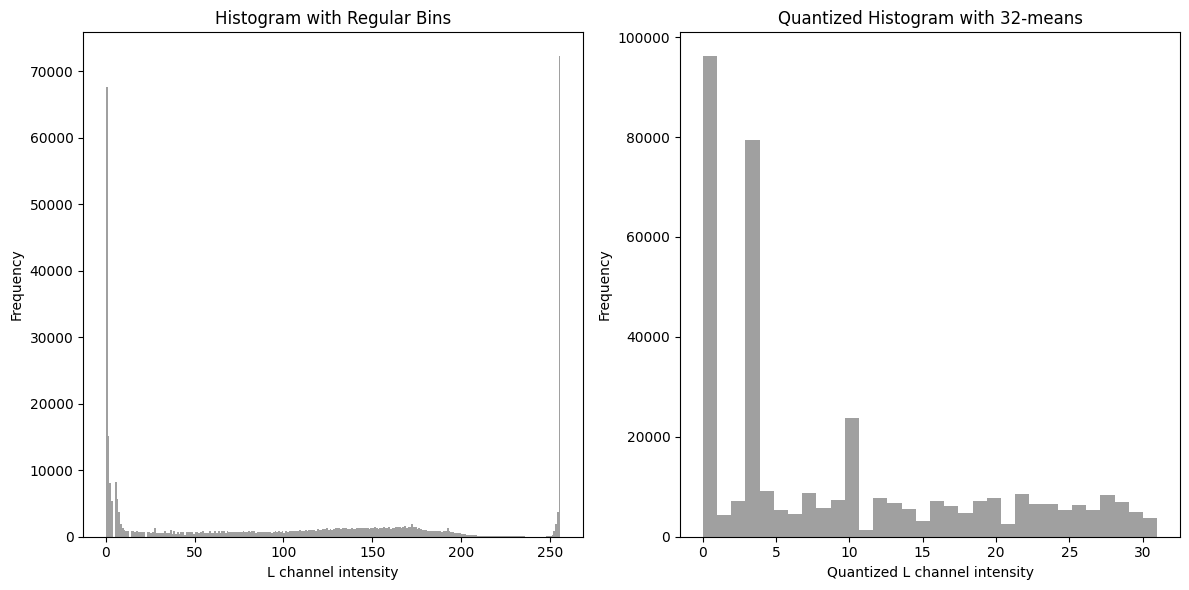

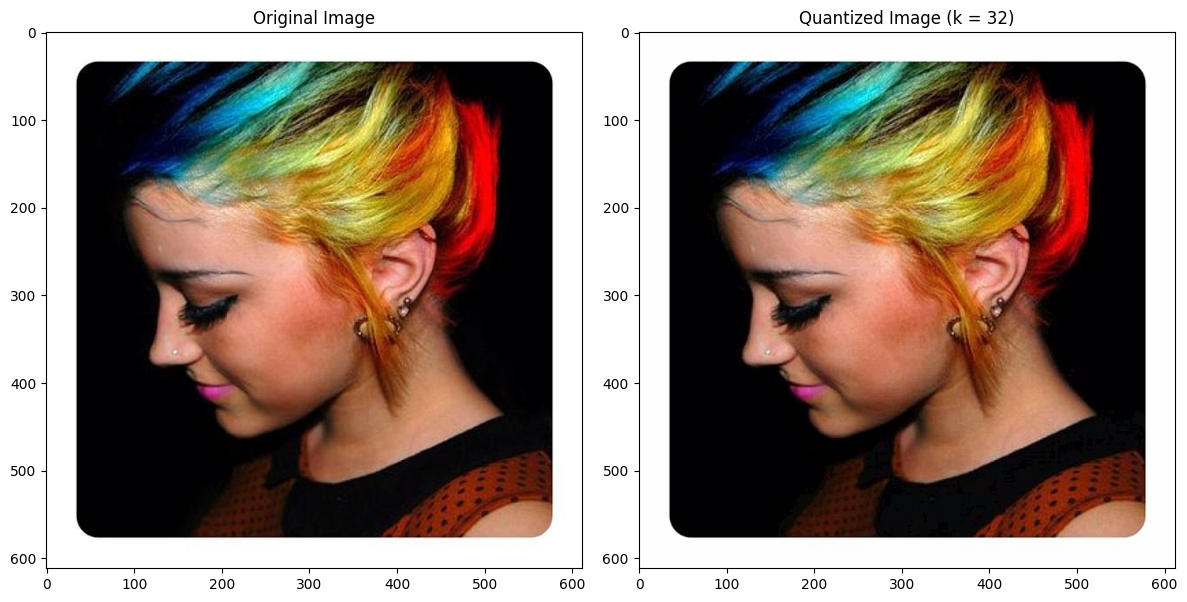

SSD between the original and quantized images (k = 32): 4722403.00


In [2]:

def compute_ssd(image1, image2):
    """
    Computes the Sum of Squared Distances (SSD) between two images.
    
    Parameters:
    image1 (numpy.ndarray): The first image as a NumPy array.
    image2 (numpy.ndarray): The second image as a NumPy array.
    
    Returns:
    float: The SSD value.
    """
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions")
    return np.sum((image1 - image2) ** 2)

def draw_histograms(image, n_clusters):
    """
    Draws the histogram of the L channel in two ways: with regular bins and with quantized bins.

    Parameters:
    image (numpy.ndarray): The input RGB image as a NumPy array.
    """
    # Convert the image to the Lab color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2Lab)
    
    # Extract the L channel
    L_channel = lab_image[:, :, 0]
    
    # Plot histogram with regular bins
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(L_channel.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.75)
    plt.title('Histogram with Regular Bins')
    plt.xlabel('L channel intensity')
    plt.ylabel('Frequency')
    
    # Quantize the L channel
    L_flattened = L_channel.reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(L_flattened)
    quantized_L = kmeans.labels_
    
    # Plot histogram with quantized bins
    plt.subplot(1, 2, 2)
    plt.hist(quantized_L, bins=n_clusters, color='gray', alpha=0.75)
    plt.title(f'Quantized Histogram with {n_clusters}-means')
    plt.xlabel('Quantized L channel intensity')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    return quantized_L, kmeans.cluster_centers_

def process_and_display_images(image_path, n_clusters_list):
    """
    Processes the image and displays the histograms and SSD for different values of k.

    Parameters:
    image_path (str): Path to the input image.
    n_clusters_list (list): List of k values for quantization.
    """
    # Load the image
    image = io.imread(image_path)
    
    for n_clusters in n_clusters_list:
        # Convert the image to the Lab color space
        lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2Lab)
        L_channel = lab_image[:, :, 0]
        
        # Quantize the L channel
        quantized_L, centroids = draw_histograms(image, n_clusters)
        
        # Create the quantized image
        quantized_L_image = centroids[quantized_L].reshape(L_channel.shape)
        
        # Replace the L channel in the Lab image with the quantized L channel
        quantized_lab_image = lab_image.copy()
        quantized_lab_image[:, :, 0] = quantized_L_image
        
        # Convert the quantized Lab image back to RGB
        quantized_rgb_image = cv2.cvtColor(quantized_lab_image, cv2.COLOR_Lab2RGB)
        
        # Display original and quantized images
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(quantized_rgb_image)
        plt.title(f'Quantized Image (k = {n_clusters})')

        plt.tight_layout()
        plt.show()
        
        # Compute and report SSD
        ssd_value = compute_ssd(image, quantized_rgb_image)
        print(f'SSD between the original and quantized images (k = {n_clusters}): {ssd_value:.2f}')
# Path to your image
image_path = './Images/Task2/colorful1.jpg'

# Values of k for quantization
n_clusters_list = [2, 8, 16,32]

# Process and display the images
process_and_display_images(image_path, n_clusters_list)

The results obtained from the execution of the program involve several aspects:

    Histograms:
        Before Quantization: The histogram with regular bins shows the distribution of pixel intensities in the L channel of the Lab color space.
        After Quantization: The histogram with quantized bins demonstrates the distribution of pixel intensities after applying k-means clustering to quantize the L channel.

    Original and Quantized Images:
        The original image is displayed as is.
        The quantized image is generated by replacing the L channel with its quantized version and then converting the Lab image back to RGB.

    Sum of Squared Distances (SSD):
        SSD is calculated between the original image and its quantized version. It measures the difference between corresponding pixel values in the two images. Lower SSD values indicate better similarity between the original and quantized images.

    Effect of Changing k:
        Varying the value of k in k-means clustering affects the granularity of quantization. A higher value of k results in finer quantization, potentially capturing more nuances in the image but also requiring more memory.
        Lower values of k lead to coarser quantization, where similar pixel intensities are grouped together, resulting in lossy compression and potential loss of image details.

    Variability in Results:
        Results may vary across executions of the program due to the random initialization of k-means clustering.
        The initialization of cluster centroids in k-means is random, which can lead to different solutions and, consequently, slightly different quantized images and SSD values.
        However, the overall trend of decreasing SSD with increasing k should be consistent across multiple runs, assuming the random initialization does not lead to vastly different clustering outcomes.

In summary, quantization aims to reduce the number of distinct colors in an image while preserving important visual information. Changing the value of k influences the degree of quantization, impacting both the image quality and the computational complexity of the process. Additionally, variability in results across executions is expected due to the random nature of k-means clustering initialization.